# Análise de dados do Titanic

## Introdução

__Objetivo:__ Realizar a análise de dados em uma amostra de dados do Titanic.

Este conjunto de dados contém informações demográficas e de passageiros de 891 dos 2224 passageiros e tripulantes a bordo do Titanic. Você pode ver uma descrição deste conjunto de dados no site da Kaggle, onde os dados foram obtidos (https://www.kaggle.com/c/titanic/data).

### Questões

"Uma das razões pelas quais o naufrágio causou tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do afundamento, alguns grupos de pessoas tinham maior probabilidade de sobreviver. outros, como mulheres, crianças e a classe alta ". - https://www.kaggle.com/c/titanic

>   __Quais fatores tornaram as pessoas mais propensas a sobreviver? <br>
    Qual idade tinham os mais velhos a morrer/sobreviver e os mais jovens a morrer/sobreviver? <br>
    O nível sócio-econômico era um fator na taxa de sobrevivência? <br>
    A idade foi um fator importante para determinar as chances de sobrevivência? <br>
    As mulheres e crianças com acesso aos botes salva-vidas tiveram maior chance de sobreviver?__ <br>

### Data Wrangling ### 

#### Descrição de dados  (de https://www.kaggle.com/c/titanic)

>    - survival: Sobrevivência (0 = Não; 1 = Sim) <br>
>    - pclass: Classe de Passageiros (1 = 1º; 2 = 2º; 3º = 3º) 
>    - name: nome 
>    - sex: sexo 
>    - age: idade 
>    - sibsp: Número de irmãos / cônjuges a bordo 
>    - parch: Número de pais / filhos a bordo 
>    - ticket: Número do Bilhete 
>    - fair: tarifa do passageiro 
>    - cabin: Cabine 
>    - embarked: Porto de Embarque (C = Cherbourg; Q = Queenstown; S = Southampton) 
     
 #### Notas especiais: 

>    - Pclass é um substituto para o status socioeconômico (SES) 1st ~ Upper; 2º ~ médio; 3 ~ menor <br>
>    - A idade está em anos; Fracionário se Idade menor que um (1) Se a Idade for Estimada, ela estará no formato xx.5 
     
Com relação às variáveis de relação familiar (isto é, sibsp e parch) algumas relações foram ignoradas. A seguir estão as definições usadas para sibsp e parch.

>    - Sibling: irmão, irmã, meio irmão ou irmã-irmã do passageiro a bordo do Titanic <br>
>    - Spouse: Marido ou Esposa do Passageiro a bordo do Titanic (Mistresses and Fiances Ignored) 
>    - Parent: Mãe ou pai do passageiro a bordo do Titanic 
>    - Child: Filho, Filha, Enteado ou Enteada do Passageiro a bordo do Titanic 

Outros parentes de família excluídos deste estudo incluem primos, sobrinhos / sobrinhas, tios / tias e sogros. Algumas crianças viajaram apenas com uma babá, portanto parch = 0 para elas. Além disso, alguns viajaram com amigos muito próximos ou vizinhos em uma aldeia, no entanto, as definições não suportam tais relações.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

df_titanic = pd.read_csv('titanic-data-6.csv')

In [75]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Limpeza de dados

Desde a descrição dos dados e perguntas até a resposta, determinei que algumas colunas do conjunto de dados não terão um papel importante na minha análise, e essas colunas podem, portanto, ser removidas. Isso fará o declínio do conjunto de dados e também ajudará no processamento do desempenho do conjunto de dados.

>   - PassengerId
>   - Name
>   - Ticket
>   - Cabin
>   - Fare
>   - Embarked

Vou dar uma abordagem de 3 passos para limpeza de dados

>   1. Identificar e remover quaisquer entradas duplicadas <br>
>   2. Remover colunas desnecessárias  
>   3. Corrigir problemas de formato ausente e de dados

#### Etapa 1 - Remover entradas duplicadas 

Concluiu que não existem linhas duplicadas, com base em testes abaixo

In [77]:
titanic_data_duplicates = df_titanic.duplicated()
print('Número de linhas duplicadas é/são {}'.format(titanic_data_duplicates.sum()))

Número de linhas duplicadas é/são 0


#### Etapa 2 - Remover colunas desnecessárias

Colunas removidas (PassengerId, Name, Ticket, Cabin, Fare, Embarked) 

In [78]:
df_titanic_novo = df_titanic.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
df_titanic_novo.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### Etapa 3 - Corrigir qualquer problema de dados ausentes

In [79]:
df_titanic_novo.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [80]:
age_faltante = pd.isnull(df_titanic_novo['Age'])
df_titanic_novo[age_faltante].head() 

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [81]:
age_female_faltante = df_titanic_novo[age_faltante]['Sex'] == 'female'
age_male_faltante = df_titanic_novo[age_faltante]['Sex'] == 'male' 
age_female_faltante.sum()

53

In [82]:
age_male_faltante.sum()

124

In [83]:
df_titanic_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


### Exploração de Dados e Visualização

In [84]:
df_titanic_novo.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [85]:
df_titanic_novo[df_titanic_novo['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


### Questão 1: Qual idade tinham os mais velhos a morrer/sobreviver e os mais jovens a morrer/sobreviver?

In [86]:
maisjovem_a_sobreviver = df_titanic_novo[df_titanic_novo['Survived'] == True]['Age'].min()
maisjovem_a_morrer = df_titanic_novo[df_titanic_novo['Survived'] == False]['Age'].min()
maisvelho_a_sobreviver = df_titanic_novo[df_titanic_novo['Survived'] == True]['Age'].max()
maisvelho_a_morrer = df_titanic_novo[df_titanic_novo['Survived'] == False]['Age'].max()

print('Mais jovem a sobreviver: {} \nMais jovem a morrer: {} \nMais velho a sobreviver: {} \nMais velho a morrer: {}'.format(
maisjovem_a_sobreviver, maisjovem_a_morrer, maisvelho_a_sobreviver, maisvelho_a_morrer)) 



Mais jovem a sobreviver: 0.42 
Mais jovem a morrer: 1.0 
Mais velho a sobreviver: 80.0 
Mais velho a morrer: 74.0


Observação: Com esses dados podemos apontar que todos os recém-nascidos sobreviveram.

### Questão 2: A classe econômica foi um fator que fez com que algumas pessoas fossem mais propensas a sobreviver?

In [87]:
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = df_titanic_novo.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        df_titanic_novo.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct 

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate: 96.81%
Class 1 - male survival rate: 36.89%
-----
Class 2 - female survival rate: 92.11%
Class 2 - male survival rate: 15.74%
-----
Class 3 - female survival rate: 50.0%
Class 3 - male survival rate: 13.54%


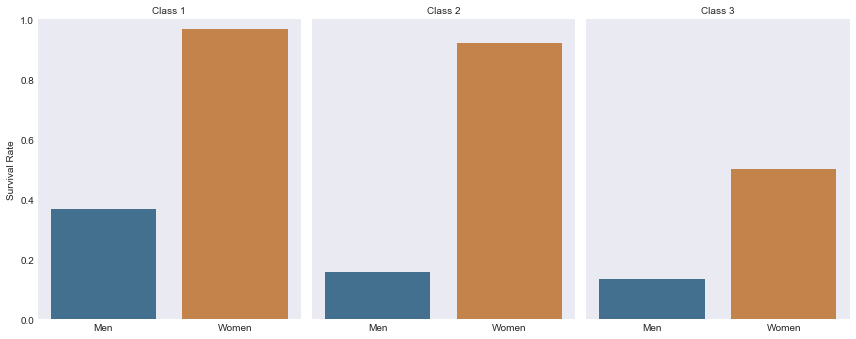

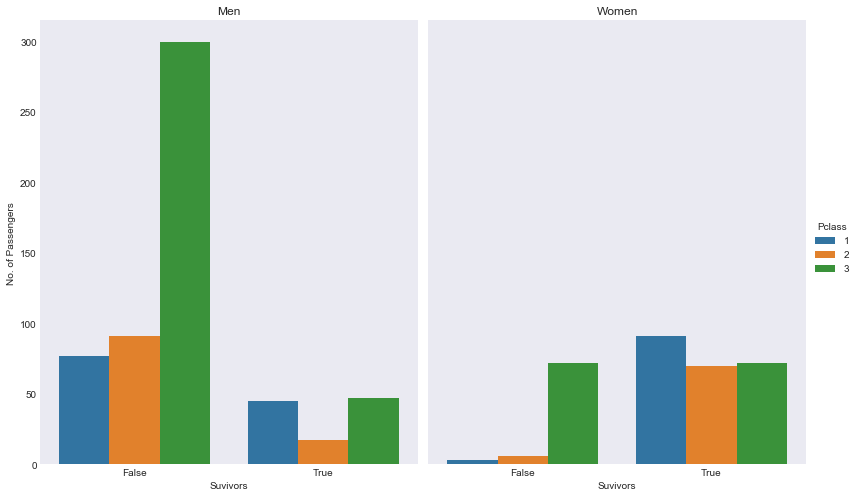

In [88]:
groupedby_class_survived_size = df_titanic_novo.groupby(['Pclass','Survived','Sex']).size()

print(groupedby_class_survived_size)
print('Class 1 - female survival rate: {}%'.format(survival_rate(1,'female')))
print('Class 1 - male survival rate: {}%'.format(survival_rate(1,'male')))
print('-----')
print('Class 2 - female survival rate: {}%'.format(survival_rate(2,'female')))
print('Class 2 - male survival rate: {}%'.format(survival_rate(2,'male')))
print('-----')
print('Class 3 - female survival rate: {}%'.format(survival_rate(3,'female')))
print('Class 3 - male survival rate: {}%'.format(survival_rate(3,'male')))  


g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=df_titanic_novo, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)


(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=df_titanic_novo, kind='count', size=7, aspect=.8)

(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    


Com base nos números encontrados, os passageiros da Classe 3 parecem ter uma taxa de sobrevivência similar aos da Classe 1, com 119 e 136 passageiros sobrevivendo, respectivamente. No entanto, olhando para as porcentagens do total de passageiros por classe e os números totais em cada classe, pode-se supor que um passageiro da Classe 1 tem cerca de 2,5 vezes mais chances de sobreviver do que um passageiro da Classe 3. Portanto, pode-se afirmar que a classe social econômica dos passageiros foi um fator importante para a taxa de sobrevivência.



### Questão 3: A idade foi um fator importante para determinar as chances de sobrevivência?

Número de homens e mulheres com idades faltantes são: 53 e 124
Número total de sobreviventes: 290 
Número total de não sobreviventes: 424 
Idade média de sobreviventes: 28.0 
Idade média de não sobreviventes: 31.0 
Mais velho a sobreviver: 80.0 
Mais velho a não sobreviver: 74.0


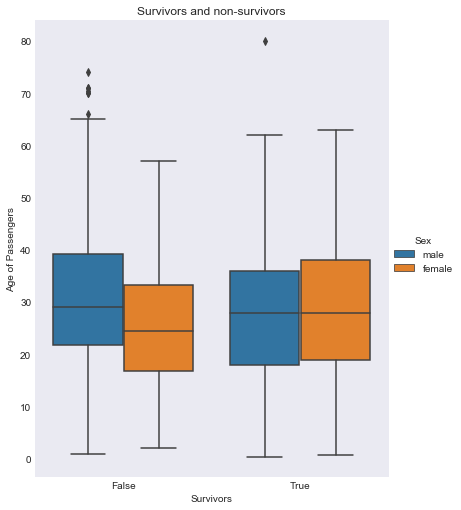

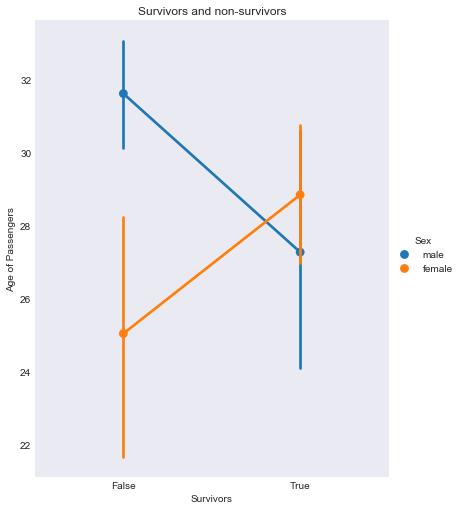

In [92]:
print ('Número de homens e mulheres com idades faltantes são: {} e {}'.format(
age_female_faltante.sum(),age_male_faltante.sum()))

df_titanic_age_novo = df_titanic_novo.dropna()

number_survived = df_titanic_age_novo[df_titanic_age_novo['Survived'] == True]['Survived'].count()
number_died = df_titanic_age_novo[df_titanic_age_novo['Survived'] == False]['Survived'].count()

mean_age_survived = df_titanic_age_novo[df_titanic_age_novo['Survived'] == True]['Age'].mean()
mean_age_died = df_titanic_age_novo[df_titanic_age_novo['Survived'] == False]['Age'].mean()

print('Número total de sobreviventes: {} \n\
Número total de não sobreviventes: {} \n\
Idade média de sobreviventes: {} \n\
Idade média de não sobreviventes: {} \n\
Mais velho a sobreviver: {} \n\
Mais velho a não sobreviver: {}' \
.format(number_survived, number_died, np.round(mean_age_survived), 
        np.round(mean_age_died), maisvelho_a_sobreviver, maisvelho_a_morrer)) 

g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=df_titanic_age_novo, kind="box", size=7, aspect=.8)

(g.set_axis_labels('Survivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)
titles = ['Survivors and non-survivors']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=df_titanic_age_novo, kind="point", size=7, aspect=.8)

(g.set_axis_labels('Survivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)
titles = ['Survivors and non-survivors']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)


Com base no gráfico e nos dados calculados acima, pode-se afirmar:

>  - Independentemente do sexo e da classe, a idade NÃO foi um fator decisivo na taxa de sobrevivência do passageiro. <br>
>  - A idade média daqueles que sobreviveram e que não sobreviveram estavam alinhados entre si.

### Questão 4: As mulheres e crianças com acesso aos botes salva-vidas tiveram maior chance de sobreviver (supondo que não houvesse escassez de botes salva-vidas)?

C:\Users\teus_\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


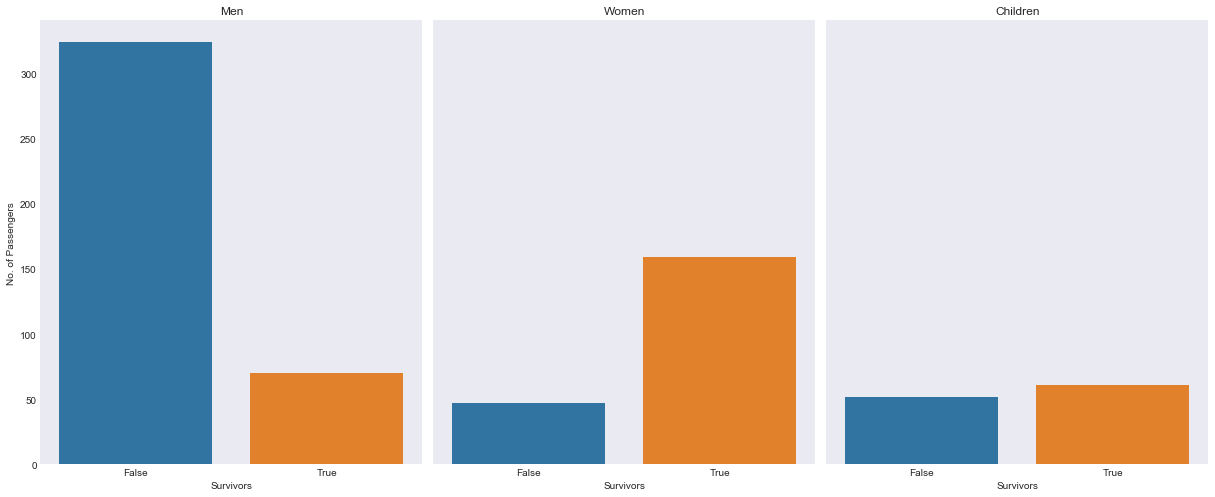

In [103]:
df_titanic_age_novo.loc[
    ( (df_titanic_age_novo['Sex'] == 'female') & 
    (df_titanic_age_novo['Age'] >= 18) ),
    'Category'] = 'Woman'

df_titanic_age_novo.loc[
    ( (df_titanic_age_novo['Sex'] == 'male') & 
    (df_titanic_age_novo['Age'] >= 18) ),
    'Category'] = 'Man'

df_titanic_age_novo.loc[
    (df_titanic_age_novo['Age'] < 18),
    'Category'] = 'Child'


print(df_titanic_age_novo.groupby(['Category','Survived']).size())


g = sns.factorplot('Survived', col='Category', data=df_titanic_age_novo, kind='count', size=7, aspect=.8)
 
(g.set_axis_labels('Survivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True']))

titles = ['Men', 'Women', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)    


Os dados, e mais ainda, os gráficos tendem a apoiar a idéia de que "mulheres e crianças primeiro" possivelmente desempenharam um papel na sobrevivência de várias pessoas. É um pouco surpreendente que mais crianças não tenham sobrevivido, mas isso poderia ser atribuído à má representação de que a idade é considerada como o ponto de corte para adultos - ou seja, se em 1900 alguém 15-17 fosse considerado adulto, eles não foram "salvos" sob a idéia de "mulheres e crianças primeiro" e seriam feitos para se defenderem sozinhos. Isso, por sua vez, mudaria o resultado dos dados acima e aumentaria o número de crianças que sobreviveram.

## Conclusões

Os resultados da análise, embora provisórios, parecem indicar que classe e sexo, ou seja, ser uma mulher com posição socioeconômica superior (primeira classe), dariam uma melhor chance de sobrevivência quando ocorreu a tragédia no Titanic. A idade não pareceu ser um fator importante. A menor taxa de sobrevivência foi para os homens da terceira classe. Essas conclusões não são definitivas. Mulheres e crianças, em todas as classes, tendem a ter uma taxa de sobrevivência mais alta do que os homens no geral, mas de forma alguma, o fato de ser uma criança ou  mulher garantiu a sobrevivência. Embora, no geral, as crianças acompanhadas pelos pais (ou babás) tiveram melhor taxa de sobrevivência em mais de 50%.

### Limitações

>   - Parte de homens e mulheres não tinham dados de idade e foi removida dos cálculos o que poder ter distorcido alguns números
>   - A categoria de 'crianças' foi assumida como qualquer pessoa com menos de 18 anos, usando o padrão norte-americano atual para a idade adulta, o que certamente não foi o caso nos anos 1900.

## Referências

>  - https://www.kaggle.com/c/titanic/data
>  - http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/
>  - https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot
>  - http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3865739/
>  - https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
>  - https://python-graph-gallery.com/ 
>  - https://seaborn.pydata.org/index.html